## 线性可分SVM实现

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix # 计算混淆矩阵
from sklearn.metrics import accuracy_score  # 计算精度得分
from sklearn.preprocessing import StandardScaler # 导入标准化库
from sklearn.model_selection import train_test_split # 将数据集划分为训练集和测试集

### 生成线性可分二分类数据并进行可视化

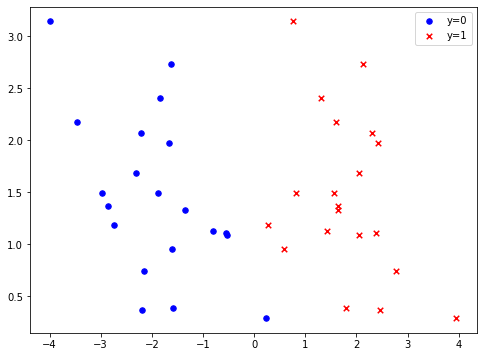

In [7]:
np.random.seed(0)
'''
分别生成两个20*2维正态数组，其中第一个以[-2,-2]为中心，第二个以[2,2]为中心
'''
X = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]  # np.r_表示按列连接两个矩阵
y = [0]*20 + [1]*20 # 生成类别变量y，前20个为0，后20个为1
fig,ax = plt.subplots(figsize=(8,6))    # 创建子图，大小为8*6
# 构建y=0的散点图，设置散点形状为'o'
ax.scatter(X[0:20,1],X[20:40,0],s=30,c='b',marker='o',label='y=0')
# 构建y=1的散点图，设置散点形状为x
ax.scatter(X[20:40,1],X[20:40,0],s=30,c='r',marker='x',label='y=1')
ax.legend()
plt.show()

### 调用SVM算法

In [8]:
from sklearn.svm import SVC # 导入支持向量机程序包
clf = SVC(kernel='linear')  # 设定模型为线性核函数的SVM
clf.fit(X,y)    # 训练数据

SVC(kernel='linear')

### 获取训练结果并预测

In [9]:
print(clf.coef_)    # 查看拟合模型的w
print(clf.support_vectors_) # 查看支持向量
print(clf.predict(X))   # 预测y
print(clf.score(X,y))   # 查看SVM的预测精度

[[0.90230696 0.64821811]]
[[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
1.0


### 绘制超平面与支持向量

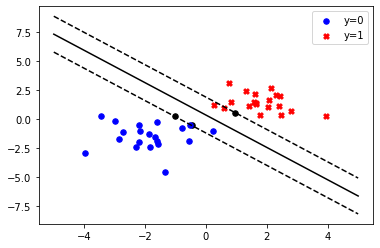

In [17]:
w = clf.coef_[0]    # 获取参数w
a = -w[0]/w[1]  # 获取斜率
xx = np.linspace(-5,5)  # 生成-5~5步长为1的数组
yy = a*xx-(clf.intercept_[0]/w[1])  # 生成超平面yy

b = clf.support_vectors_[0] # 获取支持向量的第一列
yy_down = a*xx + (b[1] - a*b[0])  # 生成下方的yy
b = clf.support_vectors_[-1]    # 获取支持向量的第二列
yy_up = a * xx + (b[1]-a * b[0])    # 生成上方的yy


plt.figure()
plt.plot(xx,yy,'k-')   # 绘制超平面
plt.plot(xx,yy_down,'k--') # 绘制超平面下方的直线
plt.plot(xx,yy_up,'k--')  # 绘制超平面上方的直线

plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],c='black',s=30,facecolors='none')

# 构建y=0的散点图，绘图样式选择paired
plt.scatter(X[:20,1],X[0:20,0],s=30,c='b',marker='o',label='y=0',cmap=plt.cm.Paired)
# 
plt.scatter(X[20:40,1],X[20:40,0],s=30,c='r',marker='X',label='y=1',cmap=plt.cm.Paired)
plt.legend()
plt.show()

#### 使用与MLP相同数据集

In [3]:
# 数据集
data_train = np.genfromtxt('optdigits.tra', delimiter=',', dtype=float)
X,y = data_train[:, :-1], data_train[:, -1]
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=2)

In [6]:
from sklearn.svm import SVC # 导入支持向量机程序包
clf2 = SVC(kernel='linear')  # 设定模型为线性核函数的SVM
clf2.fit(X,y)    # 训练数据

print(clf2.coef_)    # 查看拟合模型的w
print(clf2.support_vectors_) # 查看支持向量
print(clf2.predict(X))   # 预测y
print(clf2.score(X,y))   # 查看SVM的预测精度

[[ 0.00000000e+00 -5.55111512e-17  4.30980177e-02 ...  2.70747535e-02
   3.06029225e-02 -3.48394885e-02]
 [ 0.00000000e+00 -3.95150867e-02 -6.60874809e-02 ... -1.72500622e-01
  -1.77132692e-01 -1.41021542e-01]
 [ 0.00000000e+00  2.67195311e-02 -1.89650147e-02 ... -2.39086161e-02
   4.82471333e-02  6.93889390e-18]
 ...
 [ 0.00000000e+00  6.75099872e-02  5.99412359e-04 ... -1.71957618e-01
  -7.51262438e-02  0.00000000e+00]
 [ 0.00000000e+00  2.63543876e-01  1.46769028e-01 ... -1.00401964e-01
  -4.11509502e-02  1.11022302e-16]
 [ 0.00000000e+00  4.24363971e-04 -3.48444649e-01 ...  1.32253872e-01
   2.55361454e-01 -2.02043633e-02]]
[[ 0.         -0.34761048  2.05532073 ... -1.16024725 -0.52279362
  -0.17574055]
 [ 0.         -0.34761048 -0.53591522 ...  1.61028695  1.21515421
  -0.17574055]
 [ 0.         -0.34761048  0.11189377 ...  0.39817823 -0.52279362
  -0.17574055]
 ...
 [ 0.         -0.34761048 -0.31997889 ... -0.29445532 -0.52279362
  -0.17574055]
 [ 0.         -0.34761048  0.111893

#### 对比

`MLP`：预测准确率：0.9560669456066946
`SVM`：预测准确率：0.999476850640858